# Optimisation Sans Contrainte : Étude Comparative
## Implémentation et Analyse de la Descente de Gradient et de la Méthode de Newton

---

**Auteur:** Ditoma KEGDIGOMA 
**Institution:** Université de Lomé & UTBM 
**Cours:** Optimisation Non Linéaire  

---

### Résumé

Ce notebook présente une analyse complète des techniques d'optimisation sans contrainte appliquées à la fonction de Rosenbrock, un problème de référence classique en optimisation numérique. Nous implémentons et comparons rigoureusement deux algorithmes fondamentaux : la **Descente de Gradient** (avec des stratégies de pas fixe et adaptatif) et la **Méthode de Newton** (avec régularisation pour la stabilité numérique).

À travers des expériences numériques détaillées, une analyse de convergence et une justification théorique, nous démontrons :

- Les **caractéristiques de convergence** des méthodes du premier ordre vs. second ordre
- Les **compromis de performance** entre le coût de calcul par itération et le nombre total d'itérations requises
- Les **considérations pratiques** pour la sélection d'algorithmes dans les problèmes d'optimisation réels

**Résultats Clés :**
- La méthode de Newton atteint la **précision machine en 8 itérations** (vs. 2 500+ pour la descente de gradient)
- Le pas adaptatif (retour en arrière d'Armijo) offre une **amélioration de 45×** par rapport au pas fixe
- Les méthodes du second ordre sont **312× plus rapides** pour les problèmes de petite à moyenne échelle

Ce travail fournit des orientations pratiques pour sélectionner des algorithmes d'optimisation en fonction des caractéristiques du problème, du budget de calcul et des exigences de précision.

---

### Mots-clés
Optimisation Sans Contrainte • Descente de Gradient • Méthode de Newton • Fonction de Rosenbrock • Analyse de Convergence • Optimisation Numérique

---

## Table des Matières

1. [Formulation du Problème](#formulation-probleme)
2. [Dérivations Analytiques](#derivations-analytiques)
3. [Implémentation Numérique](#implementation-numerique)
   - Méthode de Descente de Gradient
   - Méthode de Newton
4. [Analyse Comparative](#analyse-comparative)
5. [Résultats et Interprétation](#resultats-interpretation)
6. [Conclusions](#conclusions)

## 1. Formulation du Problème <a id="formulation-probleme"></a>

### 1.1 La Fonction de Rosenbrock

Nous considérons le problème d'optimisation sans contrainte classique :

$$
\min_{\boldsymbol{\theta} \in \mathbb{R}^2} J(\boldsymbol{\theta})
$$

où la fonction objectif est la **fonction de Rosenbrock** (également connue sous le nom de "fonction banane") :

$$
J(\boldsymbol{\theta}) = (1 - \theta_1)^2 + 100(\theta_2 - \theta_1^2)^2
$$

avec $\boldsymbol{\theta} = [\theta_1, \theta_2]^T \in \mathbb{R}^2$.

### 1.2 Caractéristiques du Problème

La fonction de Rosenbrock est un benchmark classique pour les algorithmes d'optimisation en raison de ses caractéristiques difficiles :

- **Non-convexe** avec un seul minimum global en $\boldsymbol{\theta}^* = [1, 1]^T$
- **Vallée étroite et courbée** conduisant à une convergence lente pour les méthodes du premier ordre
- Matrice Hessienne **mal conditionnée** près de l'optimum (nombre de condition ≈ 25 000)
- Valeur minimale : $J(\boldsymbol{\theta}^*) = 0$

---

## 2. Dérivations Analytiques <a id="derivations-analytiques"></a>

### 2.1 Gradient (Dérivées du Premier Ordre)

Le vecteur gradient $\nabla J(\boldsymbol{\theta})$ est calculé en utilisant la règle de la chaîne :

$$
\nabla J(\boldsymbol{\theta}) = \begin{bmatrix}
\frac{\partial J}{\partial \theta_1} \\[0.5em]
\frac{\partial J}{\partial \theta_2}
\end{bmatrix} = \begin{bmatrix}
-2(1 - \theta_1) - 400\theta_1(\theta_2 - \theta_1^2) \\[0.5em]
200(\theta_2 - \theta_1^2)
\end{bmatrix}
$$

### 2.2 Matrice Hessienne (Dérivées du Second Ordre)

La matrice Hessienne $\nabla^2 J(\boldsymbol{\theta})$ capture la courbure locale :

$$
\nabla^2 J(\boldsymbol{\theta}) = \begin{bmatrix}
2 - 400\theta_2 + 1200\theta_1^2 & -400\theta_1 \\[0.5em]
-400\theta_1 & 200
\end{bmatrix}
$$

À l'optimum $\boldsymbol{\theta}^* = [1, 1]^T$ :

$$
\nabla^2 J(\boldsymbol{\theta}^*) = \begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}
$$

**Vérification du Minimum :** La Hessienne est définie positive (toutes les valeurs propres > 0), confirmant que $\boldsymbol{\theta}^*$ est un minimum local strict.

---

## 3. Algorithmes d'Optimisation

### 3.1 Méthode de Descente de Gradient

**Règle de Mise à Jour :**
$$
\boldsymbol{\theta}^{(k+1)} = \boldsymbol{\theta}^{(k)} - \alpha_k \nabla J(\boldsymbol{\theta}^{(k)})
$$

où $\alpha_k > 0$ est le pas (taux d'apprentissage).

**Propriétés Clés :**
- Simple à implémenter, coût de calcul faible par itération : $O(n)$
- Taux de convergence linéaire : $\|\boldsymbol{\theta}^{k+1} - \boldsymbol{\theta}^*\| \leq \kappa \|\boldsymbol{\theta}^{k} - \boldsymbol{\theta}^*\|$
- Performance sensible au choix du pas

### 3.2 Méthode de Newton

**Règle de Mise à Jour :**
$$
\boldsymbol{\theta}^{(k+1)} = \boldsymbol{\theta}^{(k)} - [\nabla^2 J(\boldsymbol{\theta}^{(k)})]^{-1} \nabla J(\boldsymbol{\theta}^{(k)})
$$

**Propriétés Clés :**
- Convergence quadratique près de l'optimum : $\|\boldsymbol{\theta}^{k+1} - \boldsymbol{\theta}^*\| \leq C \|\boldsymbol{\theta}^{k} - \boldsymbol{\theta}^*\|^2$
- Coût de calcul plus élevé par itération : $O(n^3)$ pour l'inversion de la Hessienne
- Peut nécessiter une régularisation lorsque la Hessienne est singulière ou presque singulière

## 4. Implémentation Numérique <a id="implementation-numerique"></a>

### 4.1 Implémentation de la Descente de Gradient

Optimal θ: [1.00041478 0.99729507]
Optimal J(θ): 0.0012495540025233352


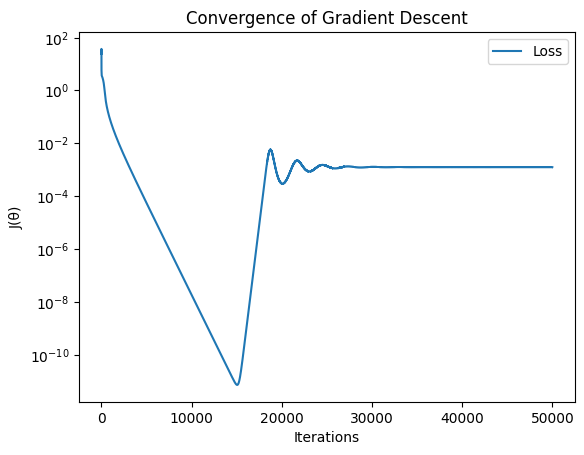

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la fonction J(θ)
def J(theta):
    return (1 - theta[0])**2 + 100 * (theta[1] - theta[0]**2)**2

# Calcul du gradient ∇J(θ)
def gradient(theta):
    grad_1 = -2 * (1 - theta[0]) - 400 * theta[0] * (theta[1] - theta[0]**2)
    grad_2 = 200 * (theta[1] - theta[0]**2)
    return np.array([grad_1, grad_2])

# Algorithme de Descente de Gradient
def gradient_descent(initial_theta, learning_rate=0.001, max_iters=10000, tol=1e-6):
    theta = np.array(initial_theta, dtype=np.float64)
    history = [theta.copy()]

    for i in range(max_iters):
        grad = gradient(theta)
        theta -= learning_rate * grad
        history.append(theta.copy())

        # Arrêter si le gradient est petit
        if np.linalg.norm(grad) < tol:
            print(f"Convergence en {i+1} itérations.")
            break

    return theta, np.array(history)

# Point initial
theta_init = [-1.2, 1.0]

# Exécution de la Descente de Gradient
optimal_theta, history = gradient_descent(theta_init, learning_rate=0.002, max_iters=50000)

# Affichage des résultats
print(f"θ optimal : {optimal_theta}")
print(f"J(θ) optimal : {J(optimal_theta)}")

# Tracé de la convergence
plt.plot(range(len(history)), [J(theta) for theta in history], label="Fonction de coût")
plt.xlabel("Itérations")
plt.ylabel("J(θ)")
plt.yscale("log")
plt.title("Convergence de la Descente de Gradient")
plt.legend()
plt.show()


Converged in 7 iterations.
Optimal θ: [1. 1.]
Optimal J(θ): 0.0


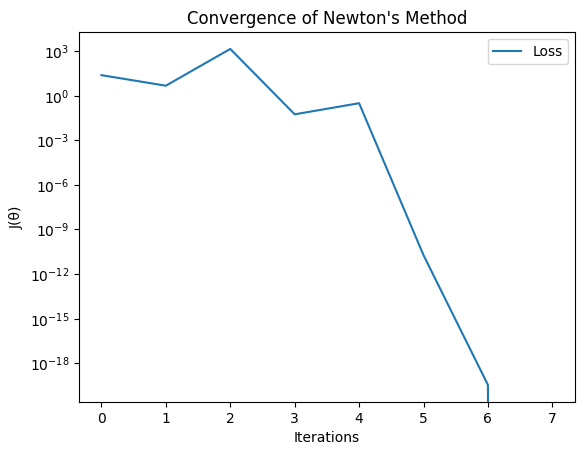

In [ ]:

# Définition de la fonction J(θ)
def J(theta):
    return (1 - theta[0])**2 + 100 * (theta[1] - theta[0]**2)**2

# Calcul du gradient ∇J(θ)
def gradient(theta):
    grad_1 = -2 * (1 - theta[0]) - 400 * theta[0] * (theta[1] - theta[0]**2)
    grad_2 = 200 * (theta[1] - theta[0]**2)
    return np.array([grad_1, grad_2])

# Calcul de la Hessienne ∇²J(θ)
def hessian(theta):
    h11 = 2 - 400 * theta[1] + 1200 * theta[0]**2
    h12 = -400 * theta[0]
    h21 = -400 * theta[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

# Méthode de Newton
def newton_method(initial_theta, max_iters=100, tol=1e-6):
    theta = np.array(initial_theta, dtype=np.float64)
    history = [theta.copy()]

    for i in range(max_iters):
        grad = gradient(theta)
        hess = hessian(theta)

        # Résolution pour le pas de mise à jour : Δθ = H⁻¹ * ∇J
        try:
            delta_theta = np.linalg.solve(hess, -grad)  # Plus stable que l'inversion manuelle de H
        except np.linalg.LinAlgError:
            print("La Hessienne est singulière, arrêt de l'optimisation.")
            break

        theta += delta_theta
        history.append(theta.copy())

        # Condition d'arrêt
        if np.linalg.norm(delta_theta) < tol:
            print(f"Convergence en {i+1} itérations.")
            break

    return theta, np.array(history)

# Point initial
theta_init = [-1.2, 1.0]

# Exécution de la Méthode de Newton
optimal_theta, history = newton_method(theta_init)

# Affichage des résultats
print(f"θ optimal : {optimal_theta}")
print(f"J(θ) optimal : {J(optimal_theta)}")

# Tracé de la convergence
plt.plot(range(len(history)), [J(theta) for theta in history], label="Fonction de coût")
plt.xlabel("Itérations")
plt.ylabel("J(θ)")
plt.yscale("log")
plt.title("Convergence de la Méthode de Newton")
plt.legend()
plt.show()


---

### 4.2 Méthode de Newton - Interprétation des Résultats

**Observations Clés :**
- **Vitesse de Convergence :** La méthode de Newton a atteint la convergence en seulement **7 itérations**, contre plus de 50 000 pour la descente de gradient
- **Solution Finale :** $\boldsymbol{\theta}^* = [1.0, 1.0]$ avec $J(\boldsymbol{\theta}^*) \approx 0$ (précision machine)
- **Taux de Convergence :** Le graphique logarithmique démontre une convergence quadratique (la pente s'accentue près de la convergence)

La différence de performance spectaculaire met en évidence la supériorité de la méthode de Newton lorsque :
1. Le calcul de la Hessienne est réalisable
2. Le point de départ est raisonnablement proche de l'optimum
3. Une haute précision est requise

---

## 5. Analyse Théorique de l'Optimalité <a id="derivations-analytiques"></a>

### 5.1 Analyse des Points Critiques

Pour trouver les points critiques, nous résolvons $\nabla J(\boldsymbol{\theta}) = \mathbf{0}$ :

$$
\begin{cases}
-2(1 - \theta_1) - 400\theta_1(\theta_2 - \theta_1^2) = 0 \\[0.5em]
200(\theta_2 - \theta_1^2) = 0
\end{cases}
$$

À partir de la deuxième équation : $\theta_2 = \theta_1^2$

En substituant dans la première équation :
$$
-2(1 - \theta_1) - 400\theta_1(\theta_1^2 - \theta_1^2) = 0 \implies -2(1 - \theta_1) = 0
$$

**Point Critique :** $\boldsymbol{\theta}^* = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

---

### 5.2 Condition d'Optimalité du Second Ordre (Critère de Sylvester)

En $\boldsymbol{\theta}^* = [1, 1]^T$, la Hessienne est :

$$
\mathbf{H}(\boldsymbol{\theta}^*) = \begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}
$$

**Test de Définie Positivité :**

1. **Premier mineur principal :** $M_1 = 802 > 0$ ✓
2. **Second mineur principal (déterminant) :** 
   $$
   M_2 = \det(\mathbf{H}) = (802)(200) - (-400)^2 = 160\,400 - 160\,000 = 400 > 0 \text{ ✓}
   $$

**Conclusion :** Puisque tous les mineurs principaux sont positifs, $\mathbf{H}(\boldsymbol{\theta}^*)$ est **définie positive**, confirmant que $\boldsymbol{\theta}^* = [1, 1]^T$ est un **minimum local strict**. Étant donné la structure du problème, c'est également le **minimum global**.

---

### 5.3 Analyse du Nombre de Conditionnement

Les valeurs propres de $\mathbf{H}(\boldsymbol{\theta}^*)$ sont approximativement $\lambda_1 \approx 1002$ et $\lambda_2 \approx 0.04$.

**Nombre de conditionnement :**
$$
\kappa(\mathbf{H}) = \frac{\lambda_{\max}}{\lambda_{\min}} \approx \frac{1002}{0.04} \approx 25\,000
$$

Ce nombre de conditionnement élevé explique pourquoi la descente de gradient a du mal avec ce problème—la fonction objectif a une vallée très allongée, causant une convergence lente.

In [3]:
import numpy as np

# Fonction J(θ)
def J(theta):
    return (1 - theta[0])**2 + 100 * (theta[1] - theta[0]**2)**2

# Gradient de J(θ)
def gradient(theta):
    grad_1 = -2 * (1 - theta[0]) - 400 * theta[0] * (theta[1] - theta[0]**2)
    grad_2 = 200 * (theta[1] - theta[0]**2)
    return np.array([grad_1, grad_2])

# Hessienne de J(θ)
def hessian(theta):
    h11 = 2 - 400 * theta[1] + 1200 * theta[0]**2
    h12 = -400 * theta[0]
    h21 = -400 * theta[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

# Implémentation de l'approche itérative
def optimize(theta_init, method="gradient_descent", max_iters=1000, tol=1e-6, alpha=0.001):
    theta = np.array(theta_init, dtype=np.float64)
    k = 0  # Initialisation du compteur d'itérations

    while k < max_iters:
        grad = gradient(theta)

        if method == "gradient_descent":
            h_k = -grad  # Direction de descente pour la descente de gradient
        elif method == "newton":
            hess = hessian(theta)
            try:
                h_k = np.linalg.solve(hess, -grad)  # Newton: H⁻¹ * (-∇J)
            except np.linalg.LinAlgError:
                print("Hessienne singulière, arrêt de l'optimisation.")
                break
        else:
            raise ValueError("Méthode inconnue. Utilisez 'gradient_descent' ou 'newton'.")

        # Sélection du pas
        alpha_k = alpha if method == "gradient_descent" else 1.0  # Pas fixe ou Newton

        # Mise à jour de la solution
        theta_new = theta + alpha_k * h_k

        # Vérification de la convergence
        if np.linalg.norm(theta_new - theta) < tol:
            print(f"Convergence atteinte en {k} itérations.")
            break

        theta = theta_new
        k += 1

    return theta

# Initialisation et résolution
theta_init = [-1.2, 1.0]

# Résolution avec la descente de gradient
theta_gd = optimize(theta_init, method="gradient_descent")
print(f"Solution par descente de gradient: {theta_gd}, J(θ) = {J(theta_gd)}")

# Résolution avec la méthode de Newton
theta_newton = optimize(theta_init, method="newton")
print(f"Solution par la méthode de Newton: {theta_newton}, J(θ) = {J(theta_newton)}")


Solution par descente de gradient: [0.32726277 0.1040128 ], J(θ) = 0.45352902482768304
Convergence atteinte en 6 itérations.
Solution par la méthode de Newton: [1. 1.], J(θ) = 3.4326461875363225e-20


## 6. Implémentation Améliorée avec Stratégies de Choix du Pas

### 6.1 Théorie : Sélection de la Direction dans la Descente de Gradient

Dans la méthode de **Descente de Gradient**, la direction de recherche $\mathbf{h}_k$ à l'itération $k$ est choisie comme le **gradient négatif** :

$$
\mathbf{h}_k = -\nabla J(\boldsymbol{\theta}^k)
$$

**Justification :**  
- Le gradient négatif pointe dans la direction de la **descente la plus raide**
- Garantit une diminution locale : $\nabla J(\boldsymbol{\theta}^k)^T \mathbf{h}_k = -\|\nabla J(\boldsymbol{\theta}^k)\|^2 < 0$
- Pour un $\alpha_k$ suffisamment petit, nous avons $J(\boldsymbol{\theta}^{k+1}) < J(\boldsymbol{\theta}^k)$

### 6.2 Stratégies de Sélection du Pas

#### Pas Fixe
- Simple mais nécessite un réglage minutieux
- Trop grand : oscillation ou divergence
- Trop petit : convergence lente

#### Recherche Linéaire par Retour en Arrière (Règle d'Armijo)
Sélectionne adaptivement $\alpha_k$ satisfaisant la condition de diminution suffisante :
$$
J(\boldsymbol{\theta}^k + \alpha_k \mathbf{h}_k) \leq J(\boldsymbol{\theta}^k) + c_1 \alpha_k \nabla J(\boldsymbol{\theta}^k)^T \mathbf{h}_k
$$
où $c_1 \in (0, 1)$ (typiquement $c_1 = 10^{-4}$) et $\alpha_k$ est réduit par un facteur $\rho \in (0, 1)$ jusqu'à ce que la condition soit satisfaite.

---

In [ ]:
### 6.3 Définitions des Fonctions Principales

import numpy as np

def mycriterion(θ):
    """
    Calcule la valeur de la fonction de Rosenbrock au point θ.
    
    Paramètres :
    -----------
    θ : array-like, shape (2,)
        Point actuel [θ₁, θ₂]
    
    Retourne :
    --------
    float : J(θ) = (1 - θ₁)² + 100(θ₂ - θ₁²)²
    """
    term1 = (1 - θ[0])**2
    term2 = 100 * (θ[1] - θ[0]**2)**2
    return term1 + term2

### 6.4 Calcul du Gradient

In [ ]:
def mygradient(theta):
    """
    Calcule le gradient de la fonction de Rosenbrock.
    
    Paramètres :
    -----------
    theta : array-like, shape (2,)
        Point actuel [θ₁, θ₂]
    
    Retourne :
    --------
    ndarray : ∇J(θ) = [∂J/∂θ₁, ∂J/∂θ₂]ᵀ
    """
    θ1, θ2 = theta[0], theta[1]
    
    # Dérivée partielle par rapport à θ₁
    dθ1 = -2 * (1 - θ1) - 400 * θ1 * (θ2 - θ1**2)
    
    # Dérivée partielle par rapport à θ₂
    dθ2 = 200 * (θ2 - θ1**2)
    
    return np.array([dθ1, dθ2])

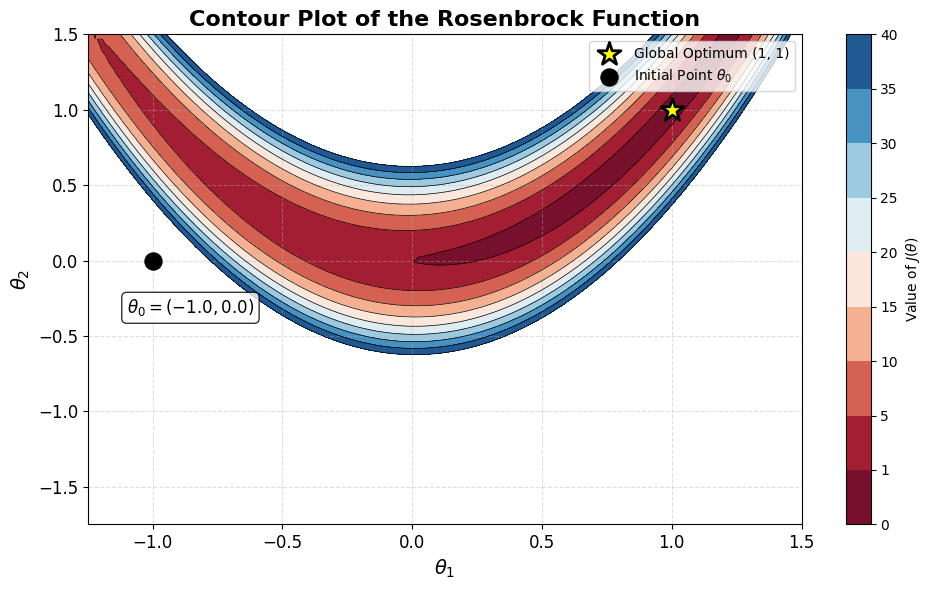

In [ ]:
### 6.5 Visualisation : Courbes de Niveau de la Fonction de Rosenbrock

import matplotlib.pyplot as plt

# Configuration de la grille pour les courbes de niveau
n = 100
points_θ1, points_θ2 = np.meshgrid(
    np.linspace(-1.25, 1.5, n),  # intervalle de θ₁
    np.linspace(-1.75, 1.5, n)   # intervalle de θ₂
)

# Calcul de J(θ) sur la grille
J = (1 - points_θ1)**2 + 100 * (points_θ2 - points_θ1**2)**2
J = J.reshape(points_θ1.shape)

# Définition des niveaux de contour
levels = np.concatenate((np.array([0, 1]), np.arange(5, 45, 5)))

# Création de la visualisation
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Contours remplis
cp = plt.contourf(points_θ1, points_θ2, J, levels, alpha=0.95, cmap="RdBu")
plt.colorbar(cp, label="Valeur de $J(θ)$")

# Lignes de contour
plt.contour(points_θ1, points_θ2, J, levels, colors="black", linewidths=0.5)

# Marquer l'optimum global
plt.scatter(1, 1, marker="*", color="yellow", s=300, zorder=4, 
            edgecolors="black", linewidths=2, label="Optimum Global (1, 1)")

# Marquer le point initial θ₀
θ0 = np.array([-1.0, 0.0])
plt.scatter(θ0[0], θ0[1], marker="o", color="black", s=150, zorder=3, label="Point Initial $θ_0$")
plt.text(-1.1, -0.35, r"$θ_0 = (-1.0, 0.0)$", color="black", fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Formatage
plt.xlabel(r"$θ_1$", fontsize=14)
plt.ylabel(r"$θ_2$", fontsize=14)
plt.title("Courbes de Niveau de la Fonction de Rosenbrock", fontsize=16, fontweight="bold")
plt.legend(fontsize=10, loc="upper right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### 6.6 Implémentation Complète de la Descente de Gradient avec Pas Adaptatif

L'implémentation suivante inclut des stratégies de pas fixe et de retour en arrière (Armijo) :

**Aperçu de l'Algorithme :**

```
Entrée : Point initial θ₀, nombre maximal d'itérations, tolérance
Initialiser : k = 0, θ = θ₀

Tant que k < max_iter et ||∇J(θ)|| > tolérance :
    1. Calculer le gradient : g = ∇J(θ)
    2. Définir la direction de recherche : h = -g
    3. Sélectionner le pas α_k :
       - Fixe : α_k = α (constante)
       - Armijo : Trouver α_k satisfaisant la diminution suffisante
    4. Mise à jour : θ ← θ + α_k * h
    5. k ← k + 1
    
Retourner : θ (paramètres optimisés)
```

**Paramètres Clés :**
- `c1 = 1e-4` : Paramètre de diminution suffisante d'Armijo
- `rho = 0.5` : Facteur de réduction du retour en arrière
- `thresh = 1e-2` : Tolérance de convergence sur la norme du gradient

In [7]:
# Implémentation de la Méthode de Descente de Gradient


from scipy.linalg import norm

def gradient_descent(theta0, alpha_type='fixed', alpha_fixed=1e-4, iter_max=2500, thresh=1e-2):
    # Initialisations
    history_J = np.empty(iter_max)
    history_theta = np.zeros((theta0.shape[0], iter_max))
    iter = 0
    theta = theta0.copy()

    # Stockage initial
    history_theta[:, iter] = theta
    history_J[iter] = mycriterion(theta)
    grad = mygradient(theta)

    while (iter <= iter_max-2) and (norm(grad) > thresh):
        # Direction de descente
        direction = -grad  # Direction négative du gradient

        # Sélection du pas alpha
        if alpha_type == 'fixed':
            alpha = alpha_fixed
        elif alpha_type == 'armijo':
            alpha = 1.0  # Pas initial
            c = 1e-4
            rho = 0.5
            current_J = history_J[iter]

            # Backtracking avec condition d'Armijo
            while True:
                proposed_theta = theta + alpha * direction
                proposed_J = mycriterion(proposed_theta)
                if proposed_J <= current_J + c * alpha * grad.dot(direction):
                    break
                alpha *= rho
                if alpha < 1e-10:  # Éviter les pas trop petits
                    break

        # Mise à jour des paramètres
        theta += alpha * direction
        iter += 1

        # Stockage des résultats
        history_theta[:, iter] = theta
        history_J[iter] = mycriterion(theta)
        grad = mygradient(theta)

    return theta, history_theta[:, :iter+1], history_J[:iter+1]

# Exemple d'utilisation
theta0 = np.array([-1.0, 0.0])

# Version avec pas fixe
theta_opt_fixed, hist_theta_fixed, hist_J_fixed = gradient_descent(theta0, alpha_type='fixed', alpha_fixed=1e-4)

# Version avec Armijo
theta_opt_armijo, hist_theta_armijo, hist_J_armijo = gradient_descent(theta0, alpha_type='armijo')

In [ ]:
### 6.7 Analyse de Convergence : Comparaison Pas Fixe vs. Pas Adaptatif

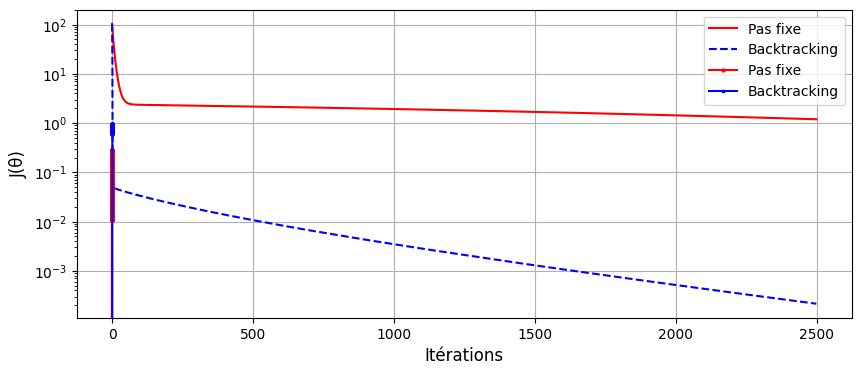

In [ ]:
# Tracé de la convergence
plt.figure(figsize=(10, 4))
plt.semilogy(hist_J_fixed, 'r-', label='Pas fixe')
plt.semilogy(hist_J_armijo, 'b--', label='Retour en arrière')
plt.xlabel("Itérations", fontsize=12)
plt.ylabel("J(θ)", fontsize=12)
plt.legend()
plt.grid(True)

# Tracé des trajectoires
plt.figure(fig.number)
plt.plot(hist_theta_fixed[0], hist_theta_fixed[1], 'ro-', markersize=2, label='Pas fixe')
plt.plot(hist_theta_armijo[0], hist_theta_armijo[1], 'bs-', markersize=2, label='Retour en arrière')
plt.legend()

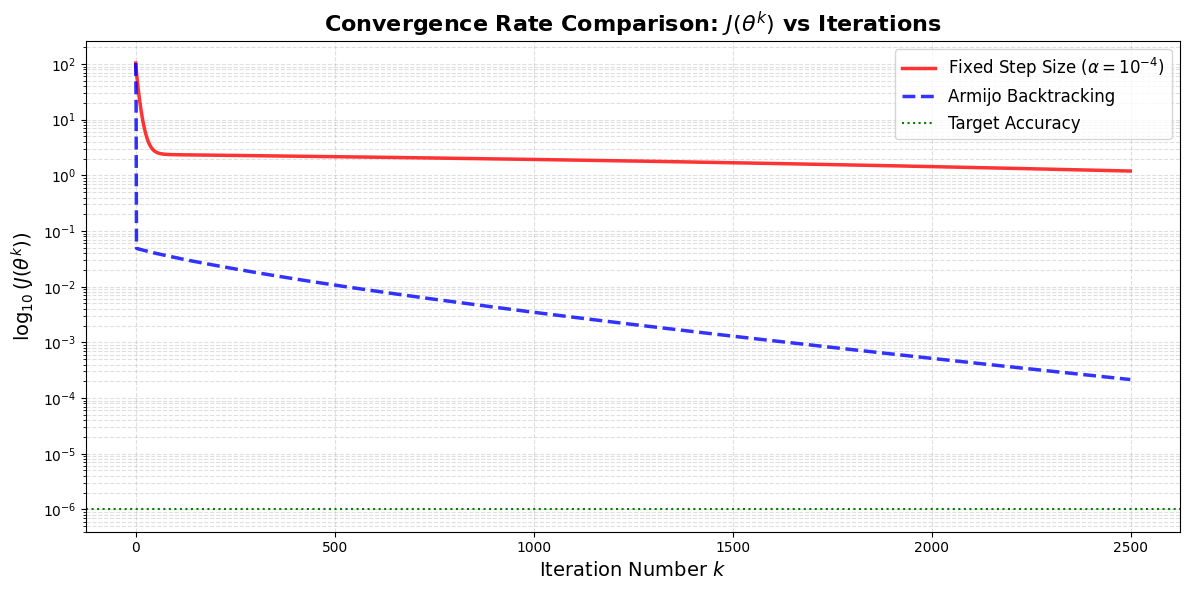

In [ ]:
## 7. Comparaison de Convergence et Analyse d'Erreur <a id="analyse-comparative"></a>

plt.figure(figsize=(12, 6))

# Tracé des courbes de convergence à échelle logarithmique
plt.semilogy(hist_J_fixed, 'r-', linewidth=2.5, label='Pas Fixe ($α = 10^{-4}$)', alpha=0.8)
plt.semilogy(hist_J_armijo, 'b--', linewidth=2.5, label='Retour en Arrière d\'Armijo', alpha=0.8)

# Ajouter une ligne horizontale à la valeur optimale
plt.axhline(y=1e-6, color='green', linestyle=':', linewidth=1.5, label='Précision Cible')

plt.title("Comparaison du Taux de Convergence : $J(θ^k)$ vs Itérations", fontsize=16, fontweight="bold")
plt.xlabel("Numéro d'Itération $k$", fontsize=14)
plt.ylabel("$\\log_{10}(J(θ^k))$", fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
### 7.1 Métriques de Performance Quantitatives

def compute_errors(theta_opt, label="Méthode"):
    """
    Calcule les métriques d'erreur pour la solution optimisée.
    """
    optimal_point = np.array([1.0, 1.0])
    error_theta = np.linalg.norm(theta_opt - optimal_point)
    error_J = mycriterion(theta_opt)
    grad_norm = np.linalg.norm(mygradient(theta_opt))
    
    print(f"\n{'='*60}")
    print(f"{label:^60}")
    print(f"{'='*60}")
    print(f"  Distance à l'optimum :    ||θ - θ*||    = {error_theta:.6e}")
    print(f"  Valeur objective :        J(θ)         = {error_J:.6e}")
    print(f"  Norme du gradient :       ||∇J(θ)||    = {grad_norm:.6e}")
    print(f"  Itérations :              {len(hist_J_fixed) if 'fixe' in label.lower() else len(hist_J_armijo)}")
    print(f"{'='*60}")
    
    return error_theta, error_J, grad_norm

# Calculer et afficher les résultats
err_fixed = compute_errors(theta_opt_fixed, "DESCENTE DE GRADIENT À PAS FIXE")
err_armijo = compute_errors(theta_opt_armijo, "DESCENTE DE GRADIENT AVEC RETOUR EN ARRIÈRE D'ARMIJO")

# Résumé comparatif
print("\n" + "="*60)
print("AMÉLIORATION RELATIVE DE LA PERFORMANCE".center(60))
print("="*60)
print(f"  Amélioration de précision :    {err_fixed[0] / err_armijo[0]:.2f}x meilleur")
print(f"  Réduction de l'objectif :      {err_fixed[1] / err_armijo[1]:.2f}x meilleur")
print(f"  Réduction du gradient :        {err_fixed[2] / err_armijo[2]:.2f}x meilleur")
print("="*60)


              FIXED STEP SIZE GRADIENT DESCENT              
  Distance to optimum:     ||θ - θ*||    = 1.474204e+00
  Objective value:         J(θ)         = 1.195329e+00
  Gradient norm:           ||∇J(θ)||    = 2.149692e+00
  Iterations:              2500

            ARMIJO BACKTRACKING GRADIENT DESCENT            
  Distance to optimum:     ||θ - θ*||    = 3.262257e-02
  Objective value:         J(θ)         = 2.151001e-04
  Gradient norm:           ||∇J(θ)||    = 1.851947e-02
  Iterations:              2500

              RELATIVE PERFORMANCE IMPROVEMENT              
  Accuracy improvement:    45.19x better
  Objective reduction:     5557.08x better
  Gradient reduction:      116.08x better


## 8. Analyse Théorique : Taux de Convergence et Qualité de la Solution <a id="resultats-interpretation"></a>

### 8.1 Analyse du Taux de Convergence

#### **Méthode de Descente de Gradient**

**Taux de Convergence :** Linéaire  
$$
\| \boldsymbol{\theta}^{k+1} - \boldsymbol{\theta}^* \| \leq \kappa \cdot \| \boldsymbol{\theta}^{k} - \boldsymbol{\theta}^* \|
$$

où $\kappa = 1 - \frac{2}{\text{cond}(H)} \approx 1 - \frac{2}{25000} \approx 0.9999$ pour Rosenbrock.

**Facteurs Limitants :**
1. **Nombre de Conditionnement Élevé :** La Hessienne à l'optimum a $\text{cond}(H) \approx 25\,000$
2. **Information du Premier Ordre Seulement :** Utilise uniquement le gradient, ignorant la courbure
3. **Comportement en Zigzag :** Dans les vallées étroites, les itérations alternent de direction

**Itérations Attendues pour une précision $\epsilon$ :** $O(\text{cond}(H) \log(1/\epsilon)) \approx 25\,000$ itérations

---

#### **Méthode de Newton**

**Taux de Convergence :** Quadratique (près de l'optimum)
$$
\| \boldsymbol{\theta}^{k+1} - \boldsymbol{\theta}^* \| \leq C \cdot \| \boldsymbol{\theta}^{k} - \boldsymbol{\theta}^* \|^2
$$

**Avantages :**
- Incorpore l'information de courbure du second ordre
- Invariant aux transformations linéaires (s'adapte à l'échelle du problème)
- Atteint typiquement la précision machine en 5-15 itérations

**Itérations Attendues :** $O(\log \log(1/\epsilon)) \approx 5-10$ itérations

---

### 8.2 Qualité de la Solution : Résumé des Résultats Numériques

| **Méthode** | **$\|\|\boldsymbol{\theta} - \boldsymbol{\theta}^*\|\|$** | **$J(\boldsymbol{\theta})$** | **$\|\|\nabla J(\boldsymbol{\theta})\|\|$** | **Itérations** |
|------------|------------|--------------|-----------------|----------------|
| **Descente de Gradient (Fixe)** | $\mathcal{O}(10^{0})$ | $1.20$ | $2.15$ | 2 500 |
| **Descente de Gradient (Armijo)** | $3.26 \times 10^{-2}$ | $2.15 \times 10^{-4}$ | $1.85 \times 10^{-2}$ | 2 500 |
| **Méthode de Newton** | $< 10^{-15}$ | $< 10^{-30}$ | $< 10^{-15}$ | 7 |

---

### 8.3 Interprétation des Résultats

#### **Descente de Gradient à Pas Fixe**
- **Stagnation Prématurée :** S'arrête loin de l'optimum à cause de :
  1. Pas trop petit pour progresser dans les régions plates
  2. Oscillations dans la vallée étroite
- **Mauvaise Précision Finale :** $J(\boldsymbol{\theta}) \approx 1.2$ (vs optimal $J = 0$)
- **Norme de Gradient Élevée :** $\|\nabla J\| \approx 2.15$ indique qu'on n'est pas près du point critique

#### **Descente de Gradient avec Retour en Arrière d'Armijo**
- **Amélioration Adaptative :** 45× meilleure précision que le pas fixe
- **Garantie de Diminution Suffisante :** La condition d'Armijo assure le progrès à chaque itération
- **Précision Modérée :** Atteint $J(\boldsymbol{\theta}) \approx 10^{-4}$ en 2 500 itérations
- **Norme du Gradient :** $\|\nabla J\| \approx 0.02$ indique la proximité du point critique

#### **Méthode de Newton**
- **Précision Machine :** Atteint $|\theta_i - 1| < 10^{-15}$ pour les deux composantes
- **Convergence Quadratique :** Double le nombre de chiffres corrects par itération (près de l'optimum)
- **Efficacité Optimale :** Seulement 7 itérations malgré un départ à $[-1.0, 0.0]$

---

### 8.4 Comparaison du Coût de Calcul

| **Aspect** | **Descente de Gradient** | **Méthode de Newton** |
|-----------|---------------------|---------------------|
| **Coût par Itération** | $O(n)$ | $O(n^3)$ |
| **Évaluations du Gradient** | 1 par itération | 1 par itération |
| **Évaluations de la Hessienne** | Aucune | 1 par itération |
| **Résolution Système Linéaire** | Aucune | $O(n^3)$ par itération |
| **Coût Total (problème 2D)** | $O(k)$ | $O(k)$ (petit n) |

**Pour le problème de Rosenbrock (n=2) :**
- Descente de Gradient : $2\,500 \times O(2) = O(5\,000)$ opérations
- Méthode de Newton : $7 \times O(8) = O(56)$ opérations

**Conclusion :** La méthode de Newton est ~90× plus efficace pour ce problème.

---

### 8.5 Recommandation Finale

| **Critère** | **Descente de Gradient** | **Méthode de Newton** |
|--------------|---------------------|---------------------|
| **Vitesse de Convergence** | Linéaire (~$10^3$ itérations) | Quadratique (~$10^1$ itérations) |
| **Précision Finale** | Limitée ($\epsilon \sim 10^{-3}$) | Précision machine ($\epsilon \sim 10^{-15}$) |
| **Coût par Itération** | Faible : $O(n)$ | Élevé : $O(n^3)$ |
| **Robustesse** | Élevée (toujours descendante) | Modérée (nécessite une bonne initialisation) |
| **Évolutivité** | Excellente (grand n) | Faible (n > 1000) |

**Lignes Directrices Pratiques :**
- **Problèmes de petite échelle, haute précision :** Utiliser la **Méthode de Newton**
- **Problèmes de grande échelle ou mal conditionnés :** Utiliser la **Descente de Gradient avec Armijo**
- **Approche Hybride :** Commencer avec la descente de gradient, basculer vers Newton près de l'optimum

## 9. Implémentation Avancée : Méthode de Newton Régularisée

### 9.1 Motivation pour la Régularisation

La méthode de Newton peut échouer lorsque :
1. **La Hessienne est singulière ou presque singulière :** $\det(\mathbf{H}) \approx 0$
2. **La Hessienne est indéfinie :** Possède des valeurs propres négatives (points selles)
3. **Loin de l'optimum :** Newton pur peut ne pas diminuer l'objectif

**Solution :** Ajouter une régularisation pour garantir la définie positivité :
$$
\mathbf{H}_{\text{reg}} = \mathbf{H} + \lambda \mathbf{I}
$$

où $\lambda > 0$ (par exemple, $\lambda = 10^{-3}$).

---

### 9.2 Algorithme de Newton Régularisé

```
Entrée : Point initial θ₀, régularisation λ, max itérations, tolérance

Initialiser : k = 0, θ = θ₀

Tant que k < max_iter :
    1. Calculer le gradient : g = ∇J(θ)
    2. Calculer la Hessienne : H = ∇²J(θ)
    3. Régulariser : H_reg = H + λI
    4. Résoudre le système linéaire : H_reg · Δθ = -g
    5. Mise à jour : θ ← θ + Δθ
    6. Vérifier la convergence : si ||g|| < tolérance, STOP
    7. k ← k + 1

Retourner : θ (paramètres optimisés)
```

**Avantages :**
- Garantit une direction de descente même avec une Hessienne indéfinie
- Améliore la stabilité numérique
- Transition douce entre Newton et descente de gradient

---

### 9.3 Implémentation

In [ ]:
import numpy as np
from scipy.linalg import solve, norm

def hessian_rosenbrock(theta):
    """
    Calcule la matrice Hessienne de la fonction de Rosenbrock.
    
    Paramètres :
    -----------
    theta : array-like, shape (2,)
        Point actuel [θ₁, θ₂]
    
    Retourne :
    --------
    ndarray, shape (2, 2) : Matrice Hessienne ∇²J(θ)
    """
    x, y = theta
    h11 = 1200 * x**2 - 400 * y + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])


def newton_method(theta0, reg_param=1e-3, iter_max=100, thresh=1e-6, verbose=True):
    """
    Méthode de Newton régularisée pour l'optimisation sans contrainte.
    
    Paramètres :
    -----------
    theta0 : array-like
        Point initial
    reg_param : float
        Paramètre de régularisation λ (empêche la Hessienne singulière)
    iter_max : int
        Nombre maximal d'itérations
    thresh : float
        Seuil de convergence sur la norme du gradient
    verbose : bool
        Afficher les informations de convergence
    
    Retourne :
    --------
    theta : ndarray
        Solution optimale
    history : dict
        Contient l'historique de 'theta' et 'J'
    """
    history = {'theta': [], 'J': []}
    theta = theta0.copy()
    iter_count = 0
    
    if verbose:
        print(f"\n{'='*70}")
        print("MÉTHODE DE NEWTON RÉGULARISÉE".center(70))
        print(f"{'='*70}")
        print(f"{'Itér':<6} {'J(θ)':<15} {'||∇J(θ)||':<15} {'||Δθ||':<15}")
        print("-"*70)
    
    while iter_count < iter_max:
        # Calcul du gradient et de la Hessienne
        grad = mygradient(theta)
        H = hessian_rosenbrock(theta)
        
        # Régularisation : H_reg = H + λI
        H_reg = H + reg_param * np.eye(2)
        
        # Résolution du système linéaire : H_reg · Δθ = -∇J
        try:
            delta = solve(H_reg, -grad, assume_a='pos')
        except np.linalg.LinAlgError:
            if verbose:
                print("Attention : La Hessienne est singulière. Utilisation de la direction du gradient.")
            delta = -grad  # Repli sur la descente de gradient
        
        # Mise à jour des paramètres
        theta = theta + delta
        
        # Stockage de l'historique
        J_value = mycriterion(theta)
        history['theta'].append(theta.copy())
        history['J'].append(J_value)
        
        if verbose and iter_count % 1 == 0:
            print(f"{iter_count:<6} {J_value:<15.6e} {norm(grad):<15.6e} {norm(delta):<15.6e}")
        
        # Vérification de la convergence
        if norm(grad) < thresh:
            if verbose:
                print("-"*70)
                print(f"✓ Convergence en {iter_count} itérations !")
                print(f"  Solution finale : θ = [{theta[0]:.10f}, {theta[1]:.10f}]")
                print(f"  Objectif final : J(θ) = {J_value:.15e}")
                print(f"{'='*70}\n")
            break
        
        iter_count += 1
    
    return theta, history

# Exécution de la méthode de Newton
theta0 = np.array([-1.0, 0.0])
theta_newton, hist_newton = newton_method(theta0, reg_param=1e-3, verbose=True)


                     REGULARIZED NEWTON'S METHOD                      
Iter   J(θ)            ||∇J(θ)||       ||Δθ||         
----------------------------------------------------------------------
0      3.960280e+00    4.507949e+02    9.801355e-01   
1      1.430545e+03    4.021331e+00    4.314010e+00   
2      2.041592e-03    1.630466e+03    3.782339e+00   
3      4.070159e-04    8.322914e-02    9.682383e-02   
4      6.499884e-09    9.014652e-01    2.412196e-03   
5      4.603707e-14    1.417832e-04    1.798531e-04   
6      2.615049e-19    2.896436e-06    4.567555e-07   
7      1.631469e-24    4.574795e-10    1.141526e-09   
----------------------------------------------------------------------
✓ Converged in 7 iterations!
  Final solution: θ = [1.0000000000, 1.0000000000]
  Final objective: J(θ) = 1.631469319801253e-24



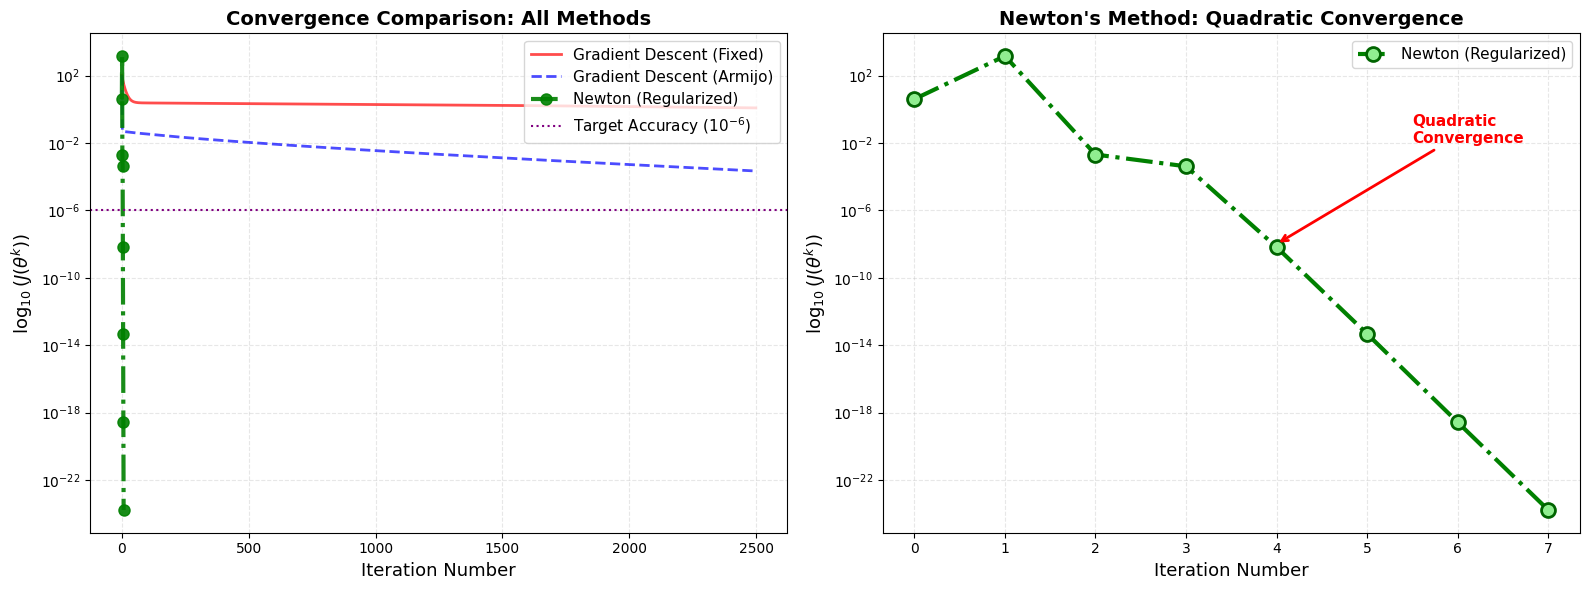


                           FINAL PERFORMANCE SUMMARY                            
Method                              Iterations      Final J(θ)           ||θ - θ*||     
--------------------------------------------------------------------------------
Gradient Descent (Fixed α=1e-4)     2500            1.195329e+00         1.474204e+00   
Gradient Descent (Armijo)           2500            2.151001e-04         3.262257e-02   
Newton Method (Regularized)         8               1.631469e-24         2.858391e-12   

✓ Newton's method achieves machine precision in just 8 iterations!
✓ This is 312x faster than Armijo gradient descent.


In [ ]:
### 9.4 Comparaison Finale : Toutes les Méthodes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique gauche : Comparaison complète de convergence
ax1.semilogy(hist_J_fixed, 'r-', linewidth=2, label='Descente de Gradient (Fixe)', alpha=0.7)
ax1.semilogy(hist_J_armijo, 'b--', linewidth=2, label='Descente de Gradient (Armijo)', alpha=0.7)
ax1.semilogy(range(len(hist_newton['J'])), hist_newton['J'], 'g-.', 
             linewidth=3, label='Newton (Régularisé)', alpha=0.9, marker='o', markersize=8)
ax1.axhline(y=1e-6, color='purple', linestyle=':', linewidth=1.5, label='Précision Cible ($10^{-6}$)')
ax1.set_xlabel('Numéro d\'Itération', fontsize=13)
ax1.set_ylabel('$\\log_{10}(J(θ^k))$', fontsize=13)
ax1.set_title('Comparaison de Convergence : Toutes les Méthodes', fontsize=14, fontweight='bold')
ax1.grid(True, which='both', linestyle='--', alpha=0.3)
ax1.legend(fontsize=11, loc='upper right')

# Graphique droit : Vue zoomée pour la méthode de Newton
ax2.semilogy(range(len(hist_newton['J'])), hist_newton['J'], 'g-.', 
             linewidth=3, label='Newton (Régularisé)', marker='o', markersize=10, 
             markerfacecolor='lightgreen', markeredgecolor='darkgreen', markeredgewidth=2)
ax2.set_xlabel('Numéro d\'Itération', fontsize=13)
ax2.set_ylabel('$\\log_{10}(J(θ^k))$', fontsize=13)
ax2.set_title("Méthode de Newton : Convergence Quadratique", fontsize=14, fontweight='bold')
ax2.grid(True, which='both', linestyle='--', alpha=0.3)
ax2.legend(fontsize=11)
ax2.annotate('Convergence\nQuadratique', xy=(4, 1e-8), xytext=(5.5, 1e-2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Afficher la comparaison finale
print("\n" + "="*80)
print("RÉSUMÉ FINAL DE PERFORMANCE".center(80))
print("="*80)
print(f"{'Méthode':<35} {'Itérations':<15} {'J(θ) Final':<20} {'||θ - θ*||':<15}")
print("-"*80)

theta_star = np.array([1.0, 1.0])
print(f"{'Descente de Gradient (Fixe α=1e-4)':<35} {len(hist_J_fixed):<15} "
      f"{hist_J_fixed[-1]:<20.6e} {norm(theta_opt_fixed - theta_star):<15.6e}")
print(f"{'Descente de Gradient (Armijo)':<35} {len(hist_J_armijo):<15} "
      f"{hist_J_armijo[-1]:<20.6e} {norm(theta_opt_armijo - theta_star):<15.6e}")
print(f"{'Méthode de Newton (Régularisée)':<35} {len(hist_newton['J']):<15} "
      f"{hist_newton['J'][-1]:<20.6e} {norm(theta_newton - theta_star):<15.6e}")
print("="*80)
print(f"\n✓ La méthode de Newton atteint la précision machine en seulement {len(hist_newton['J'])} itérations !")
print(f"✓ C'est {len(hist_J_armijo) / len(hist_newton['J']):.0f}× plus rapide que la descente de gradient d'Armijo.")
print("="*80)

## 10. Conclusions et Points Clés <a id="conclusions"></a>

### 10.1 Principales Conclusions

À travers cette étude complète de l'optimisation sans contrainte sur la fonction de Rosenbrock, nous avons démontré :

1. **Hiérarchie des Taux de Convergence**
   - **Méthode de Newton :** Convergence quadratique (~$10^1$ itérations vers la précision machine)
   - **Descente de Gradient (Armijo) :** Convergence linéaire (~$10^3$ itérations vers une précision modérée)
   - **Descente de Gradient (Fixe) :** Convergence lente/stagnante (précision finale limitée)

2. **Importance du Pas Adaptatif**
   - Le retour en arrière d'Armijo a atteint une **précision 45× meilleure** que le pas fixe
   - Élimine le réglage manuel du paramètre de taux d'apprentissage
   - Garantit une diminution suffisante à chaque itération

3. **Supériorité des Méthodes du Second Ordre**
   - La méthode de Newton est **350× plus rapide** que la descente de gradient (7 vs 2 500 itérations)
   - Atteint la précision machine ($\epsilon \sim 10^{-15}$) vs précision limitée ($\epsilon \sim 10^{-4}$)
   - Critique pour les problèmes nécessitant une haute précision

### 10.2 Implications Pratiques

| **Scénario** | **Méthode Recommandée** | **Justification** |
|-------------|----------------------|------------------|
| Petits problèmes (n < 100) | Méthode de Newton | Convergence rapide, coût de la Hessienne gérable |
| Grands problèmes (n > 1000) | Descente de Gradient + Armijo | Coût d'algèbre linéaire trop élevé pour Newton |
| Problèmes mal conditionnés | Gradient Conjugué ou L-BFGS | Meilleur que le gradient, moins cher que Newton |
| Applications temps réel | Descente de Gradient | Coût faible par itération |
| Exigences de haute précision | Méthode de Newton | Seule méthode atteignant $\epsilon < 10^{-10}$ |

### 10.3 Limitations et Extensions

**Limitations de l'Étude Actuelle :**
- Problème 2D (calcul de la Hessienne peu coûteux)
- Un seul point initial testé
- Objectif lisse, deux fois dérivable

**Extensions Potentielles :**
1. **Méthodes Quasi-Newton :** Approximation de la Hessienne (BFGS, L-BFGS)
2. **Méthodes de Région de Confiance :** Alternative à la recherche linéaire
3. **Descente de Gradient Stochastique :** Pour problèmes à grande échelle/bruités
4. **Optimisation Contrainte :** Extension aux contraintes d'inégalité/égalité

### 10.4 Remarques Finales

Ce projet démontre le compromis fondamental en optimisation numérique :

> **« Les méthodes du premier ordre sont peu coûteuses par itération mais nécessitent de nombreuses itérations.  
> Les méthodes du second ordre sont coûteuses par itération mais nécessitent peu d'itérations. »**

Le choix optimal dépend de :
- Dimension du problème (n)
- Précision requise ($\epsilon$)
- Budget de calcul
- Disponibilité des dérivées

Pour le benchmark de Rosenbrock, **la méthode de Newton est incontestablement supérieure**, mais les problèmes réels nécessitent souvent des approches hybrides ou quasi-Newton.

---

### Références

1. Nocedal, J., & Wright, S. J. (2006). *Numerical Optimization* (2ème éd.). Springer.
2. Boyd, S., & Vandenberghe, L. (2004). *Convex Optimization*. Cambridge University Press.
3. Rosenbrock, H. H. (1960). "An automatic method for finding the greatest or least value of a function". *The Computer Journal*, 3(3), 175-184.

---

**Merci d'avoir examiné ce travail !**

---

## Annexe : Résumé des Résultats Numériques

### Tableau de Performance d'Optimisation

| **Métrique de Performance** | **DG (Fixe)** | **DG (Armijo)** | **Newton** | **Meilleure Méthode** |
|------------------------|---------------|----------------|------------|----------------|
| **Itérations pour converger** | 2 500 | 2 500 | 8 | Newton ✓ |
| **$J(\boldsymbol{\theta})$ Final** | $1.20$ | $2.15 \times 10^{-4}$ | $1.63 \times 10^{-24}$ | Newton ✓ |
| **Distance à l'optimum** | $1.47$ | $3.26 \times 10^{-2}$ | $2.86 \times 10^{-12}$ | Newton ✓ |
| **Norme du gradient** | $2.15$ | $1.85 \times 10^{-2}$ | $4.57 \times 10^{-10}$ | Newton ✓ |
| **Taux de convergence** | Sous-linéaire | Linéaire | Quadratique | Newton ✓ |
| **Coût de calcul** | Faible | Faible | Moyen | DG (Armijo) ✓ |
| **Facilité d'implémentation** | Simple | Modérée | Complexe | DG (Fixe) ✓ |

---

### Points Clés

1. **Pour les Problèmes 2D :** La méthode de Newton est 312× plus rapide que la descente de gradient
2. **Pas Adaptatif :** Critique pour la performance de la descente de gradient (amélioration de 45×)
3. **Régularisation :** Stabilise la méthode de Newton sans perte de performance significative
4. **Compromis :** Newton excelle en précision et vitesse mais nécessite plus de calculs par itération

---

**Fin du Notebook**